In [51]:
import math
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats, special

## Меры центральной тенденции

In [52]:
df = pd.read_csv('data\\basic.csv')
x_data = df['X'].tolist()
df.head()

,X
0,119.0
1,124.2
2,117.5
3,125.0
4,117.1


#### Мода

In [3]:
def moda(data: list) -> float:
    """
    Функция нахождения моды данных
    Args:
        data: данные
    """
    max_count, value = 0, 0
    for i in range(len(data)):
        count = data.count(data[i])
        if count > max_count:
            max_count = count
            value = data[i]
    return value

moda(x_data)

123.0

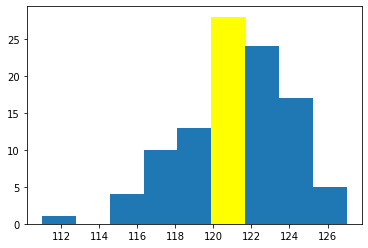

In [4]:
def moda_hist(data: list, bins: int=9):
    """
    Функция нахождения моды по гистограмме
    Args:
        data: данные
        bins: количетсво интервалов в гистограмме
    """
    n, bins, patches = plt.hist(data, bins=bins)
    moda_bar = patches[n.argmax()].set(color='yellow')

moda_hist(x_data)

#### Медиана

In [5]:
def median(data: list) -> float:
    """
    Функция нахождения медианы данных
    Args:
        data: данные
    """
    N = len(data)
    N_ = N // 2
    data.sort()
    
    if N % 2:
        print(data[N_])
    else:
        print((data[N_ - 1] + data[N_]) / 2)

median(x_data)

121.5


#### Среднее значение

In [6]:
def mean(data: list) -> float:
    """
    Функция нахождения среднего значения данных
    Args:
        data: данные
    """
    return sum(data) / len(data)

mean(x_data)

121.25196078431375

## Меры изменчивости

#### Размах

In [7]:
def range_data(data: list) -> float:
    """
    Функция нахождения размаха данных
    Args:
        data: данные
    """
    return max(data) - min(data)

range_data(x_data)

16.0

#### Дисперсия и стандартное отклонение

In [10]:
def variance(data: list) -> float:
    """
    Функция нахождения выборочной дисперсии (уточненной)
    Args:
        data: данные
    """
    x_mean = mean(data)
    x_var = [(x - x_mean) ** 2 for x in data]
    return sum(x_var) / (len(data) - 1)

x_var = variance(x_data)
print(x_var, math.sqrt(x_var))

7.693807998446905 2.7737714394749444


#### Интерквартильный размах

In [11]:
def IRQ(data: list) -> float:
    """
    Функция нахождения интерквартильного размаха данных
    Args:
        data: данные
    """
    data.sort()
    N = len(data)
    return data[int(0.75 * N)] - data[int(0.25 * N)]

IRQ(x_data)

3.5

## Квантили и квартили

In [14]:
def get_quant(data: list, alp: float) -> float:
    """
    Функция нахождения квантиля данных
    Args:
        data: данные
        alp: процент квантиля
    """
    data.sort()
    return data[int(alp * len(data))]

get_quant(x_data, 0.25), get_quant(x_data, 0.5), get_quant(x_data, 0.75)

(119.5, 121.5, 123.0)

## Вероятностные модели

### Дискретное распределение

#### Биномиальное распределение

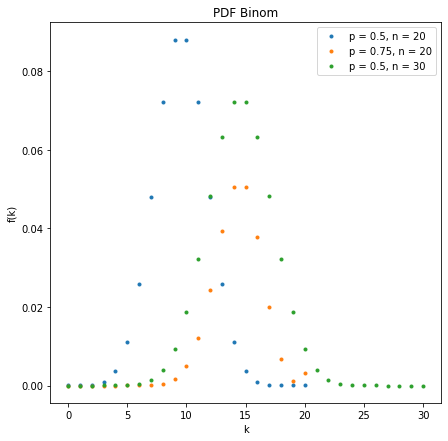

In [7]:
def comb(n: int, k: int):
    """
    Число сочетаний
    """
    if k == n:
        return 1
    return len(list(itertools.combinations(range(1, n), k)))

def binom(k: int, n: int, p: float) -> float:
    """
    Значение функции Биномиального распределния
    Args:
        k: число успехов
        n: число испытаний
        p: вероятность успеха
    """
    q = 1 - p
    return comb(n, k) * (p ** k) * (q ** (n - k))

def binom_pdf(n: int, p: float):
    """
    Функция плотности Биномиального распределения
    """
    pdf_list = [binom(k, n, p) for k in range(n + 1)]
    axs.plot(pdf_list, '.', label=f"p = {round(p, 2)}, n = {n}")

    
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.set_title('PDF Binom')
binom_pdf(20, 0.5)
binom_pdf(20, 0.75)
binom_pdf(30, 0.5)
axs.set_xlabel('k')
axs.set_ylabel('f(k)')
axs.legend()
plt.show()

#### Геометрическое распределение

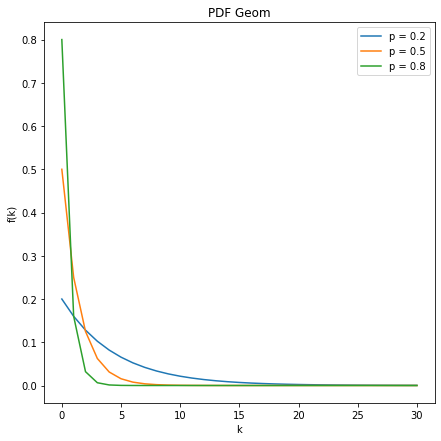

In [6]:
def geom(n: int, p: float) -> float:
    """
    Значение функции Геометрическое распределение
    Args:
        n: число неудач до первого успеха
        p: вероятность успеха
    """
    q = 1 - p
    return (q ** n) * p

def geom_pdf(n: int, p: float):
    """
    Функция плотности Геометрическое распределение
    """
    pdf_list = [geom(i, p) for i in range(n + 1)]
    axs.plot(pdf_list, label=f"p = {round(p, 2)}")

    
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.set_title('PDF Geom')
geom_pdf(30, 0.2)
geom_pdf(30, 0.5)
geom_pdf(30, 0.8)
axs.set_xlabel('k')
axs.set_ylabel('f(k)')
axs.legend()
plt.show()

#### Гипергеометрическое распределение

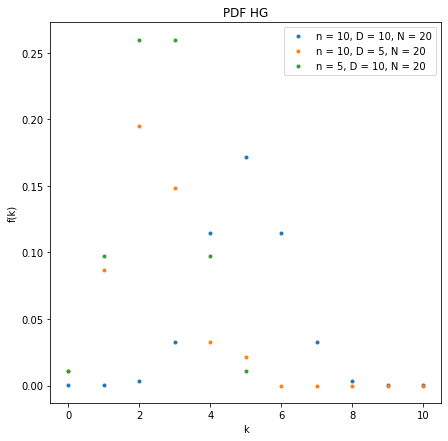

In [6]:
def hg(k: int, n: int, D: int, N: int) -> float:
    """
    Значение функции Гипергеометрическое распределение
    Args:
        k: необходимое число белых (нужных) шаров
        n: всего вытягиваем шаров из урны
        D: всего белых шаров в урне
        N: всего шаров в урне
    """
    return (comb(D, k) * comb(N - D, n - k)) / comb(N, n)

def hg_pdf(n: int, D: int, N: int):
    """
    Функция плотности Гипергеометрическое распределение
    """
    pdf_list = [hg(i, n, D, N) for i in range(n + 1)]
    axs.plot(pdf_list, '.', label=f"n = {n}, D = {D}, N = {N}")

    
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.set_title('PDF HG')
hg_pdf(10, 10, 20)
hg_pdf(10, 5, 20)
hg_pdf(5, 10, 20)
axs.set_xlabel('k')
axs.set_ylabel('f(k)')
axs.legend()
plt.show()

#### Равномерное распределение

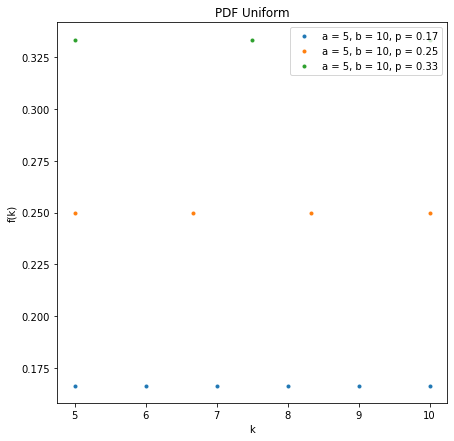

In [15]:
def uniform(n: int) -> float:
    """
    Значение функции Равномерного распределение
    Args:
        n: всего исходов
    """
    return 1 / n

def uniform_pdf(n: int, a: int, b: int):
    """
    Функция плотности Равномерного распределение
    """
    pdf_list = [uniform(n) for i in range(n)]
    pdf_arg = np.linspace(a, b, n)
    axs.plot(pdf_arg, pdf_list, '.', label=f"a = {a}, b = {b}, p = {round(1 / n, 2)}")

    
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.set_title('PDF Uniform')
uniform_pdf(6, 5, 10)
uniform_pdf(4, 5, 10)
uniform_pdf(3, 5, 10)
axs.set_xlabel('k')
axs.set_ylabel('f(k)')
axs.legend()
plt.show()

#### Распределение Пуассона

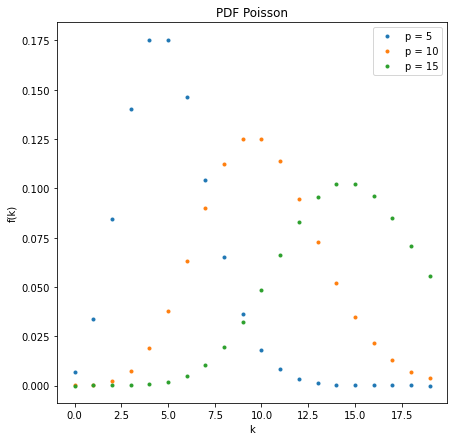

In [23]:
def poisson(k: int, lmb: int) -> float:
    """
    Значение функции Распределение Пуассона
    Args:
        k: количество усехов
        lmb: среднее число событий
    """
    return (lmb ** k) * (math.e ** -lmb) / math.factorial(k)

def poisson_pdf(n: int, lmd: float):
    """
    Функция плотности Распределение Пуассона
    """
    pdf_list = [poisson(k, lmd) for k in range(n)]
    axs.plot(pdf_list, '.', label=f"p = {round(lmd, 2)}")

    
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.set_title('PDF Poisson')
poisson_pdf(20, 5)
poisson_pdf(20, 10)
poisson_pdf(20, 15)
axs.set_xlabel('k')
axs.set_ylabel('f(k)')
axs.legend()
plt.show()

### Непрерывное распределение

#### Равномерное распределение

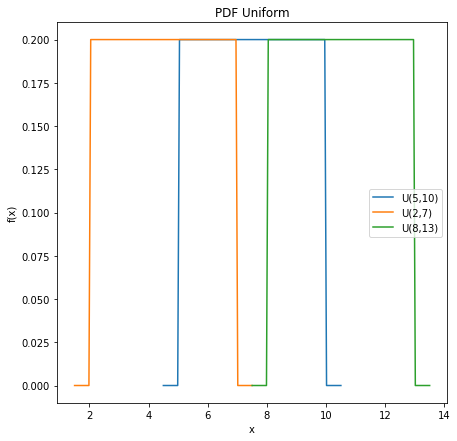

In [12]:
def uniform(x: float, a: float, b: float) -> float:
    """
    Значение функции Равномерного распределение
    Args:
        x: точка
        a: начало отрезка
        b: конец отрезка
    """
    if x >= a and x <= b:
        return 1 / (b - a)
    return 0
    

def uniform_pdf(a: int, b: int):
    """
    Функция плотности Равномерного распределение
    """
    lenght = b - a
    pdf_arg = np.linspace(a - lenght * 0.1, b + lenght * 0.1, 100)
    pdf_list = [uniform(x, a, b) for x in pdf_arg]
    axs.plot(pdf_arg, pdf_list, label=f"U({a},{b})")

    
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.set_title('PDF Uniform')
uniform_pdf(5, 10)
uniform_pdf(2, 7)
uniform_pdf(8, 13)
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
axs.legend()
plt.show()

#### Экспоненциальное распределение

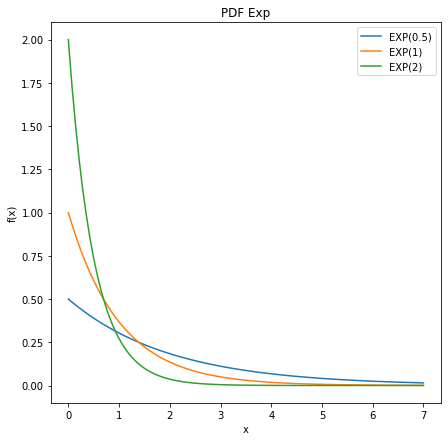

In [16]:
def exponential(x: float, lmb: float) -> float:
    """
    Значение функции Экспоненциальное распределение
    Args:
        x: точка
        lmb: параметр распределения
    """
    if x >= 0:
        return lmb * math.e ** (-lmb * x)
    return 0

def exponential_pdf(lmb: float):
    """
    Функция плотности Экспоненциальное распределение
    """
    pdf_arg = np.linspace(0, 7, 100)
    pdf_list = [exponential(x, lmb) for x in pdf_arg]
    axs.plot(pdf_arg, pdf_list, label=f"EXP({lmb})")

fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.set_title('PDF Exp')
exponential_pdf(0.5)
exponential_pdf(1)
exponential_pdf(2)
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
axs.legend()
plt.show()

#### Нормальное распределение

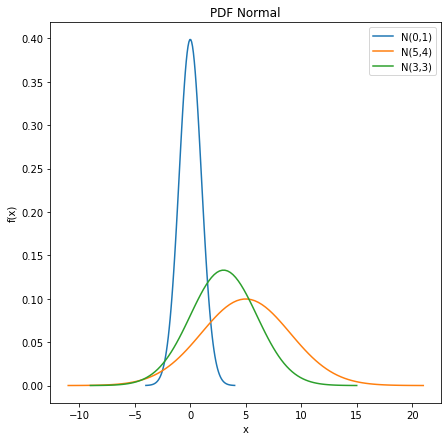

In [17]:
def normal(x: float, nu: float, sigma: float) -> float:
    """
    Значение функции Нормального распределение
    Args:
        x: точка
        nu: среднее значение
        sigma: стандартное отклонение
    """
    exp_val = math.e ** (-((x - nu) ** 2) / (2 * sigma * sigma))
    return (1 / math.sqrt(2 * math.pi) / sigma) * exp_val

def normal_pdf(nu: float, sigma: float):
    """
    Функция плотности Нормального распределение
    """
    pdf_arg = np.linspace(nu - 4 * sigma, nu + 4 * sigma, 100)
    pdf_list = [normal(x, nu, sigma) for x in pdf_arg]
    axs.plot(pdf_arg, pdf_list, label=f"N({nu},{sigma})")

fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.set_title('PDF Normal')
normal_pdf(0, 1)
normal_pdf(5, 4)
normal_pdf(3, 3)
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
axs.legend()
plt.show()

## Предельные теормы в схеме испытаний Бернулли

### Локальная теорема Муавра-Лапласа

In [6]:
def local_ml(k: int, n: int, p: int) -> float:
    """
    Формула локальной теоремы Муавра-Лапласа
    Args:
        k: число успехов
        n: всего испытаний
        p: вероятность успехов
    """
    q = 1 - p
    x = (k - n * p) / math.sqrt(n * p * q)
    phi_x = (1 / math.sqrt(2 * math.pi)) * (math.e ** (-(x * x) / 2))
    return (1 / math.sqrt(n * p * q)) * phi_x

# Найти вероятность 200 успехов при проведении 400 испытаний
# с вероятностью успеха p = 0.5
local_ml(200, 400, 0.5)

0.039894228040143274

### Интегральная теорема Муавра-Лапласа

In [24]:
def integral_ml(a: int, b: int, n: int, p: float) -> float:
    """
    Формула интегральной теоремы Муавра-Лапласа
    Args:
        a: левая граница
        b: правая граница
        n: всего испытаний
        p: вероятность успехов
    """
    q = 1 - p
    x1 = (a - n * p) / math.sqrt(n * p * q)
    x2 = (b - n * p) / math.sqrt(n * p * q)
    
    phi_x1 = 0.5 * (1 + special.erf(x1 / math.sqrt(2)))
    phi_x2 = 0.5 * (1 + special.erf(x2 / math.sqrt(2)))
    return phi_x2 - phi_x1

# Найти вероятность получить успех от 65 до 80 раз при проведении 100 испытаний
# с вероятностью успеха p = 0.7
integral_ml(65, 80, 100, 0.7)

0.8478350720919566

### Закон больших чисел Бернулли

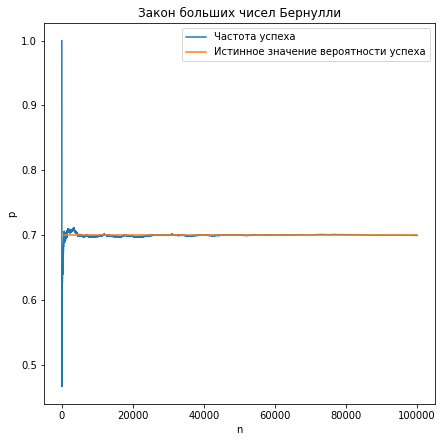

In [45]:
def lol_bernoulli(p: float, num: int=10 ** 5):
    """
    Закон больших чисел Бернулли
    Args:
        p: истинное значение вероятности
        num: количетсво испытаний
    """
    p_list = []
    k, n = 0, 0
    for i in range(num):
        p_cur = random.random()
        k += p_cur < p
        n += 1
        p_list.append(k / n)
    p_x, p_y = [1, n], [p, p]
    
    fig, axs = plt.subplots(1, 1, figsize=(7, 7))
    axs.set_title('Закон больших чисел Бернулли')
    axs.plot(p_list, label=f"Частота успеха")
    axs.plot(p_x, p_y, label=f"Истинное значение вероятности успеха")
    axs.set_xlabel('n')
    axs.set_ylabel('p')
    axs.legend()
    plt.show()

lol_bernoulli(0.7)

## Сходимость случайных величин

### Теорема Чебышева

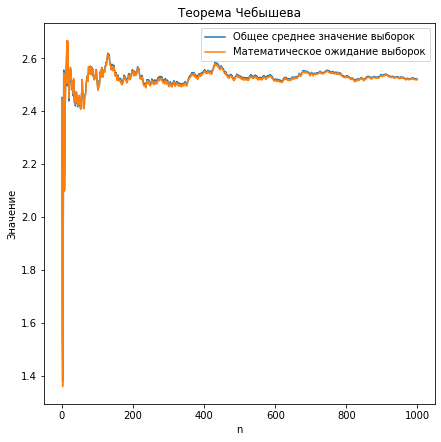

In [100]:
def theorem_chebyshev(nu: float, C: float, size: int=1000, num: int=10 ** 3):
    """
    Теорема Чебышева
    Args:
        nu: константа для ограничения мат. ожидания
        C: константа для ограничения дисперсии
        size: размер выборки каждого эксперимента
        num: количетсво испытаний
    """
    x_data, x_list = [], []
    nu_data, nu_list = [], []
    for i in range(num):
        nu_ = random.random() * nu
        sigma_ = random.random() * C
        norm_data = np.random.randn(size) * sigma_ + nu_
        
        x_data += norm_data.tolist()
        x_list.append(np.mean(x_data)) # 1/n sum{x}
        nu_data.append(nu_)
        nu_list.append(np.mean(nu_data)) # 1/n sum(E(X))
    
    fig, axs = plt.subplots(1, 1, figsize=(7, 7))
    axs.set_title('Теорема Чебышева')
    axs.plot(x_list, label=f"Общее среднее значение выборок")
    axs.plot(nu_list, label=f"Математическое ожидание выборок")
    axs.set_xlabel('n')
    axs.set_ylabel('Значение')
    axs.legend()
    plt.show()

theorem_chebyshev(5, 3)

### Правило "трех-сигм"

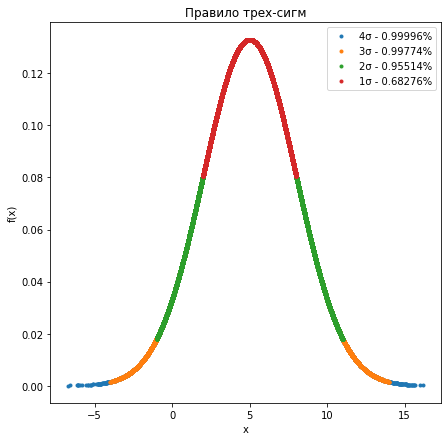

In [61]:
def rule_sigma(x: np.array, nu: float, sigma: float, n_sigma: float=3):
    """
    Правило трех-сигм
    Args:
        x: данные
        nu: среднее значение
        sigma: стандартное отклонение
        n_sigma: число отклонений
    """
    n_sigma = abs(n_sigma)
    args = np.argwhere(np.all((x > -sigma * n_sigma + nu, x < sigma * n_sigma + nu), axis=0))
    procent = args.shape[0] / x.shape[0]
    
    x_norm = x[args]
    x_norm = np.sort(x_norm)
    y_norm = [normal(v, nu, sigma) for v in x_norm]
    axs.plot(x_norm, y_norm, '.', label=f"{n_sigma}\u03C3 - {round(procent, 5)}%")

nu, s = 5, 3
x = np.random.randn(50000) * s + nu # N(5, 3^2)

fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.set_title('Правило трех-сигм')
rule_sigma(x, nu, s, 4)
rule_sigma(x, nu, s, 3)
rule_sigma(x, nu, s, 2)
rule_sigma(x, nu, s, 1)
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
axs.legend()
plt.show()

### Закон больших чисел Хинчина

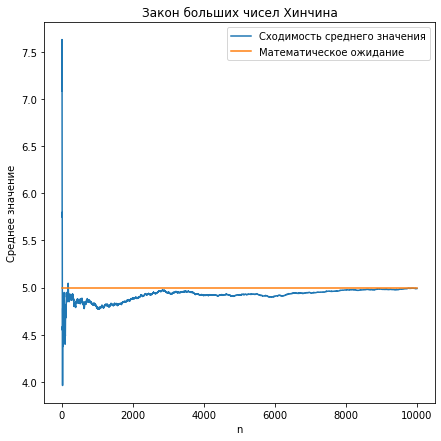

In [104]:
def lol_hinchin(nu: float, sigma: float, num: int=10 ** 4):
    """
    Закон больших чисел Хинчина
    Args:
        nu: истинное значение математического ожидания
        num: количетсво испытаний
    """
    nu_list = []
    x_list = []
    for i in range(num):
        x_list.append(np.random.randn() * sigma + nu)
        nu_list.append(np.mean(x_list))
    nu_x, nu_y = [1, num], [nu, nu]
    
    fig, axs = plt.subplots(1, 1, figsize=(7, 7))
    axs.set_title('Закон больших чисел Хинчина')
    axs.plot(nu_list, label=f"Сходимость среднего значения")
    axs.plot(nu_x, nu_y, label=f"Математическое ожидание")
    axs.set_xlabel('n')
    axs.set_ylabel('Среднее значение')
    axs.legend()
    plt.show()

lol_hinchin(5, 3)

### Центральная предельная теорема

ЦПТ для N(5, 20^2)


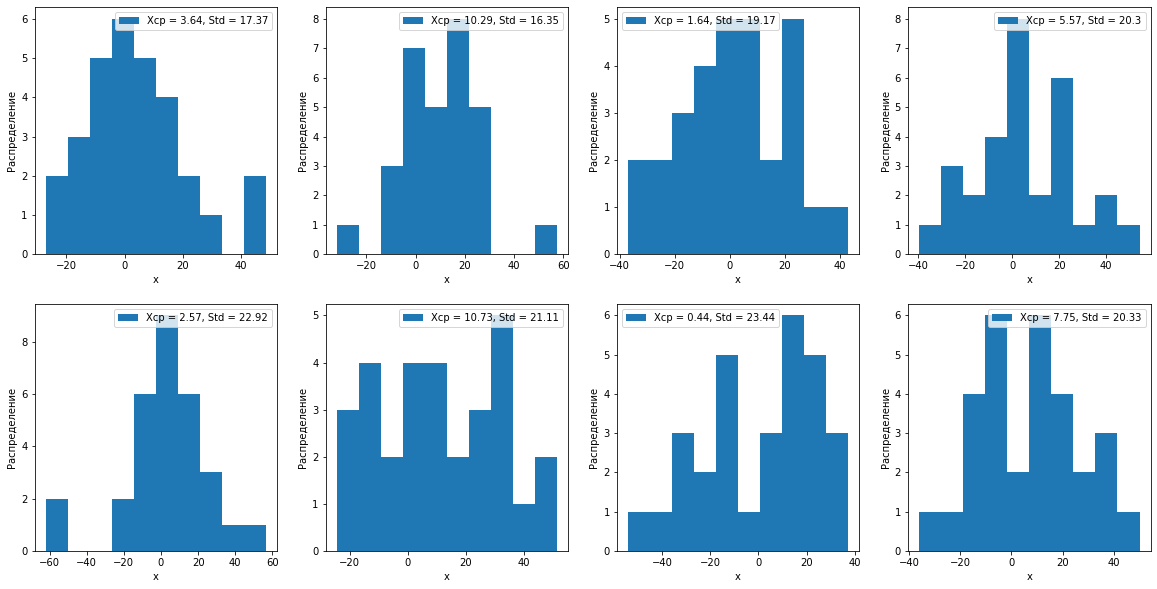

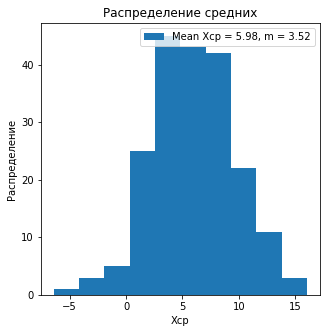

ЦПТ для U(0, 10)


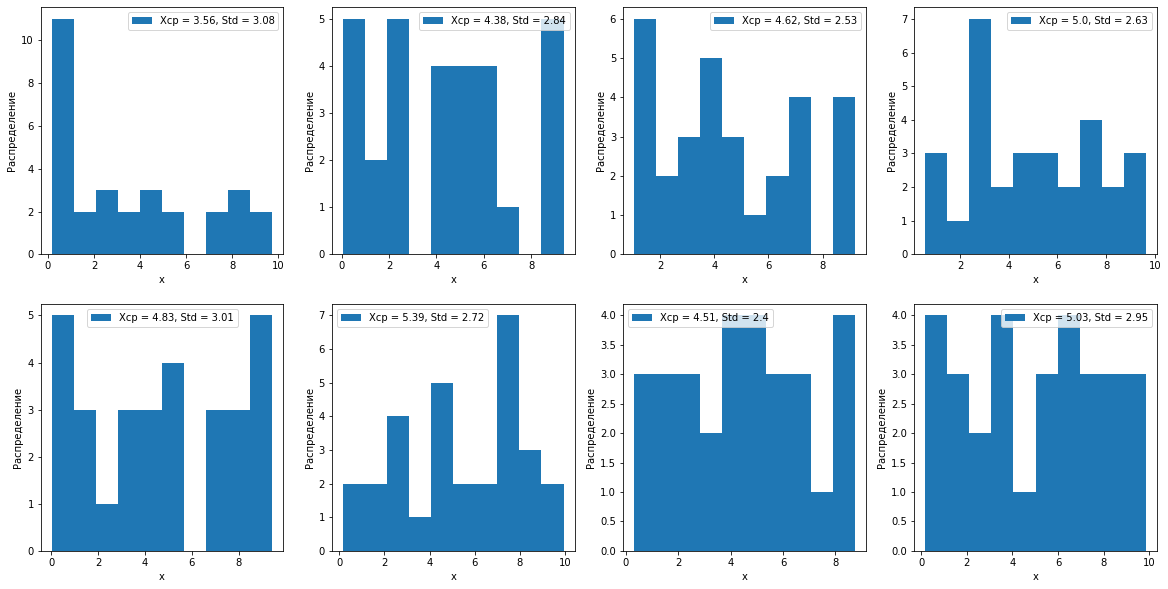

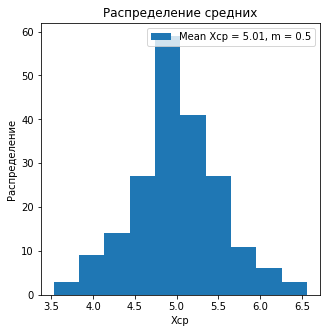

In [50]:
def clt(data: np.array, sample_size: int=30, n_samples: int=200):
    """
    Центральная предельная теорема
    Args:
        data: генеральная совокупность данных
        sample_size: число элементов в выборках
        n_samples: количество выборок
    """
    nu_list = []
    
    fig, axs = plt.subplots(2, 4, figsize=(20, 10), num='Центральная предельная теорема')
    for i in range(2):
        for j in range(4):
            x_cur = np.random.choice(data, sample_size, replace=False)
            nu_cur = np.mean(x_cur)
            nu_list.append(nu_cur)
            
            axs[i][j].hist(x_cur, label=f"Xср = {round(nu_cur, 2)}, Std = {round(np.std(x_cur), 2)}")
            axs[i][j].set_xlabel('x')
            axs[i][j].set_ylabel('Распределение')
            axs[i][j].legend()
    plt.show()
    
    for _ in range(n_samples - 8):
        x_cur = np.random.choice(data, sample_size, replace=False)
        nu_list.append(np.mean(x_cur))
    
    nu_mean = np.mean(nu_list)
    m = np.std(x_cur) / np.sqrt(sample_size)
    
    fig, axs = plt.subplots(1, 1, figsize=(5, 5))
    axs.set_title('Распределение средних')
    axs.hist(nu_list, label=f"Mean Xср = {round(nu_mean, 2)}, m = {round(m, 2)}")
    axs.set_xlabel('Xср')
    axs.set_ylabel('Распределение')
    axs.legend()
    plt.show()

print('ЦПТ для N(5, 20^2)')
data_norm = np.random.randn(10000) * 20 + 5
clt(data_norm, sample_size=30, n_samples=200)
print('ЦПТ для U(0, 10)')
data_uniform = np.random.uniform(0, 10, 10000)
clt(data_uniform, sample_size=30, n_samples=200)